# Описание задачи
Выполнить предобработку данных сервиса Яндекс Недвижимость и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости Санкт-Петербурга.
# Цели исследования
1. Изучить, как быстро продаются квартиры.
2. Определить, что больше всего влияет на их стоимость.
3. Посчитать цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
4. Выяснить, как стоимость объектов зависит от расстояния до центра города.

# Ход исследования
1. Обзор данных.
2. Предобработка данных.
3. Преобразование данных.
4. Разведочный анализ данных.

In [339]:
import pandas as pd
import re
import numpy as np

In [340]:
data = pd.read_csv('real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [341]:
# Приводим все названия колонок к нижнему регистру с помощью методов rename() и lower().
data.rename(str.lower, axis='columns', inplace=True)

In [342]:
# Методом info() выводим общую информацию о данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [343]:
# Используя сочетание метода isna() и функции sum(), выводим количество пропущенных значений в каждом столбце.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

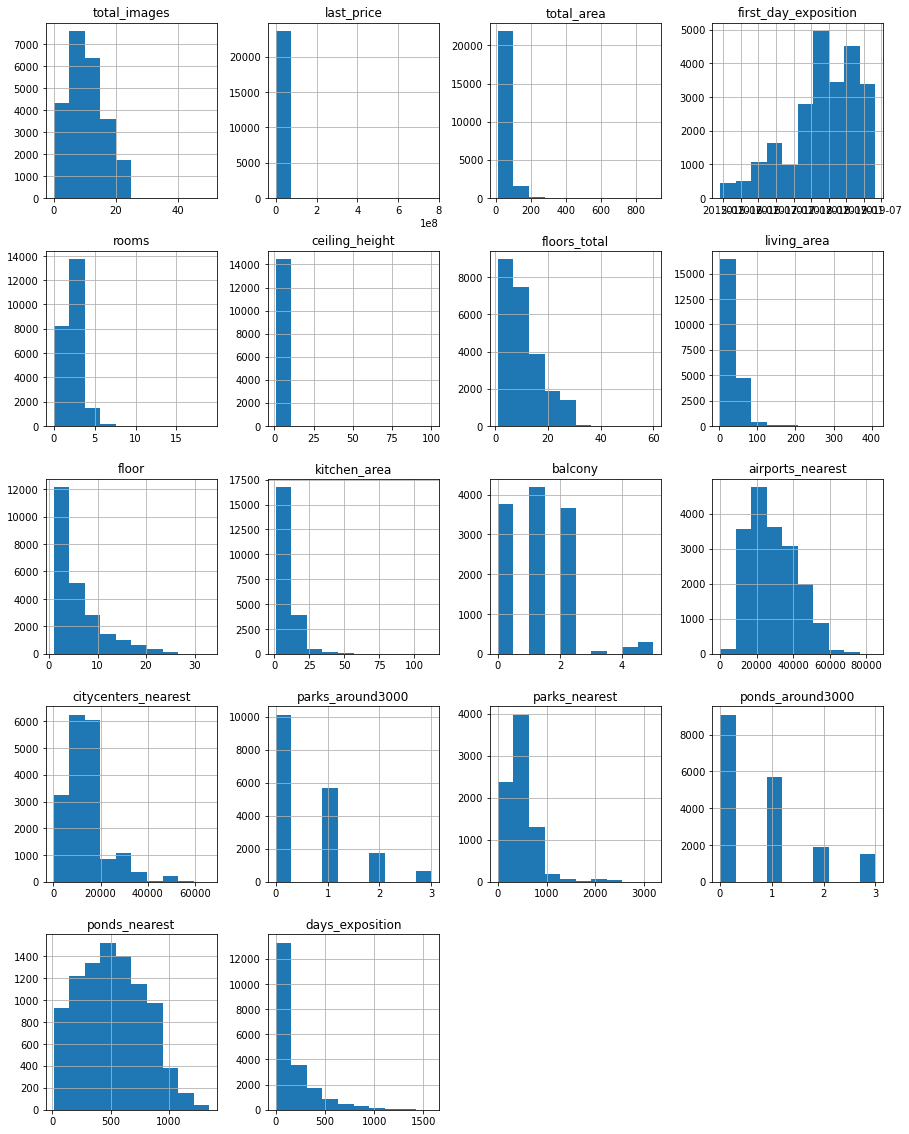

In [344]:
# Строим функцией hist() общую гистограмму для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20));

In [345]:
# Предполагаем, что пропущенные значения означают, что квартира не является апартаментами.
# И с помощью логической индексации заполняем пропуски ложным булевым значением False.
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

In [346]:
# Подсчитываем медианную долю жилой площади, помещая её в переменную living_area_fraction, и выводим на экран функцией print().
print(
    'living_area_fraction:', living_area_fraction :=\
    data['living_area'].median() / data['total_area'].median()
)

living_area_fraction: 0.5769230769230769


In [347]:
# Объявляем функцию living_area_fraction_func().
def living_area_fraction_func(row):
    # Если значение с столбце living_area не пропущено, возвращаем исходное значение.
    if not pd.isna(row['living_area']):
        return row['living_area']
    # В противном случае заполняем пропуски, опираясь на мединную долю жилой площади относительно общей (total_area).
    # Округляя полученное значение до одного знака после запятой функцией round().
    else:
        return round(row['total_area'] * living_area_fraction, 2)

In [348]:
# Методом apply() заполняем 
data['living_area'] = data.apply(living_area_fraction_func, axis=1)

In [349]:
data['living_area']

0        51.00
1        18.60
2        34.30
3        91.73
4        32.00
         ...  
23694    73.30
23695    38.00
23696    29.70
23697    44.28
23698    12.30
Name: living_area, Length: 23699, dtype: float64

In [350]:
x = round(5.76543, 2)
print(x)

5.77


In [351]:
# Убеждаемся, что пропусков в колонке не осталось.
data['living_area'].isna().sum()

0

In [352]:
# Вновь обращаемся к логической индексации, подсчитывая медианную долю площади кухни (kitchen_area).
total_and_kitchen_area_median = data.loc[(data['studio'] == False) &
                                      (data['open_plan'] == False) &
                                      (~data['kitchen_area'].isna()),
                                      ['total_area', 'kitchen_area']].median()

# Помещаем её в переменную kitchen_area_fraction и выводим н экран.
print(
    'kitchen_area_fraction:', kitchen_area_fraction :=\
    total_and_kitchen_area_median['kitchen_area'] / total_and_kitchen_area_median['total_area']
)

kitchen_area_fraction: 0.17333333333333334


In [353]:
# Методом where() заполняем пропущенные значения в столбце kitchen_area.
(
    data['kitchen_area']
    .where(~data['kitchen_area'].isna(),
           (data['total_area'] * kitchen_area_fraction).round(1),
           inplace=True)
)

In [354]:
# Проверяем, что пропуски заполнены.
data['kitchen_area'].isna().sum()

0

In [355]:
# Так же заполняем нулями пропуски в столбце balcony, предполагая, что отсутствующие значения говорят, что балконов нет.
(
    data['balcony']
    .where(~data['balcony'].isna(),
           0,
           inplace=True)
)

In [356]:
# Проверяем количество пропусков и в этом столбце.
data['balcony'].isna().sum()

0

In [357]:
# Решаем заполнить пропуски в колонке ceiling_height (высота потолков) медианным значением.
# Для этого сначала посмотрим, каково оно с помощью метода median().
data['ceiling_height'].median()

2.65

In [358]:
# И заполним пропуски, используя метод fillna().
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [359]:
# Проверяем количество пропущенных значений.
data['ceiling_height'].isna().sum()

0

In [360]:
# Методом dropna() удаляем строки в столбце floors_total, так как их лишь 86 и это не повлияет на дальнейшую работу.
data.dropna(subset=['floors_total'], inplace=True)

In [361]:
# И проверяем количество пропусков.
data['floors_total'].isna().sum()

0

In [362]:
# И проверяем все колонки датафрейма на наличие пропущенных значений.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
citycenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

# Возможные причины появление пропусков
В столбце **ceiling_height** причиной могло послужить банальное незнание высоты потолка.

В **floors_total** пропуски могли появиться из-за невнимательности автора объявления, забывшего указать этажность жилья.

Пропуски в **living_area** могли быть обусловлены незнанием жилой площади или нежеланием указывать такую информацию.

В **is_apartment** причиной пропусков стало отсутсвие необходимости указывать, что квартира не является апартаментами.

В **kitchen_area** пропуски можно объяснить как отсутсвием кухни как отдельной комнаты (например, в студиях и квартирах со свободной планировкой), так и схожими с *living_area* причинами.

Пропуски в **balcony** возникли из-за того, что в виду отсутствия балкона вместо указания 0 этот пункт мог быть пропущен.

Отсутствующие значения в колонках **locality_name**, **airports_nearest**, **citycenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest** и **days_exposition** объясняются схожими с *living_area* причинами.

Заполнять пропуски медианой или средним в других колонках с количественными значениями не будем из-за невозможности сделать хоть на чём-то основанное предположение о расстоянии до центра города, числе водоёмов и других отсутствующих параметрах.

In [364]:
# Меняем тип данных в столбце с датой публикации объявления методом to_datetime()
# data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [365]:
# Приводим значения в столбце is_apartment к булеву типу данных (почему-то через info() колонка отображаются как object).
data['is_apartment'] = data['is_apartment'].astype(bool)

In [366]:
# Используем dtype, чтобы посмотреть, поменялся ли тип данных в столбце.
data['is_apartment'].dtype

dtype('bool')

In [367]:
# Видим, что количество дней, которые потребовались для продажи, записаны числом с плавающей точкой (float).
data['days_exposition']

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23613, dtype: float64

In [368]:
# Убеждаемся в этом, проверяя тип данных в столбце.
data['days_exposition'].dtype

dtype('float64')

In [369]:
# Методом astype() приводим значения к формату float, так же как и с is_apartment, не понимая почему, но подозревая nan :)
data = data.astype({'days_exposition':'float64'}, errors='ignore')

In [370]:
# И наконец меняем формат float на int в тех слобцах, где это кажется разумным.
data = data.astype(
    {
        'last_price': 'int64',
        'rooms': 'int64',
        'floors_total': 'int64',
        'balcony': 'int64',
        'airports_nearest': 'int64',
        'citycenters_nearest': 'int64',
        'parks_around3000': 'int64',
        'parks_nearest': 'int64',
        'ponds_around3000': 'int64',
        'ponds_nearest': 'int64',
        'days_exposition': 'int64'
    },
    errors='ignore'
)

In [371]:
# Проверяем итоговые типы данных в столбцах датафрейма.
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
citycenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

# Какие типы данных были изменены и почему
Тип данных был изменён только в столбце **first_day_exposition**: значения были преобразованы в *datetime* для работы с датами и временем.

В столбце **is_apartment** данные были преобразованы из numpy.bool_ в *bool*, так как они отображались как тип данных object.

Также были изменены типы данных в тех **колонках, где значения необоснованно были записаны в формате float**. Они были преобразованы в *int*.

In [373]:
# Приступаем к работе с дубликатами. Для начала методом duplicated() в сочетании с sum() проверим наличие явных дубликатов.
# data.duplicated().sum()

In [374]:
# Объявляем функцию locality_name_func().
def locality_name_func(x):
    # Которая с помощью регулярных выражений поможет нам избавиться от дублей в названиях населённых пунктов.
    if type(x) == str:
        return ''.join(re.findall('[А-Я][^А-Я]*', x))
    # И присвоить пропускам корректно записанные отсутствующие значения.
    else:
        return np.nan

In [375]:
# Вновь обращаемся к методу apply(), изменяя значения в столбце.
data['locality_name'] = data['locality_name'].apply(locality_name_func)

In [376]:
# Решаем, что 49 строк с отсутствующим значением в locality_name нам не помешают, и оставляем их нетронутыми.
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.70,2016-04-15,3,3.55,5,50.80,2,False,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000,80.00,2017-05-30,3,2.65,4,42.60,2,False,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765,42.70,2015-09-20,1,2.65,24,15.60,3,False,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593,62.40,2015-10-11,2,2.65,24,33.10,21,False,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000,46.50,2016-05-28,2,2.65,5,30.80,5,False,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000,89.50,2014-12-09,2,3.00,8,39.62,7,False,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000,80.00,2015-12-10,3,4.00,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000,83.00,2015-08-14,3,2.65,7,47.88,6,False,...,14.40,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000,85.50,2016-01-20,3,2.65,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000,30.00,2016-04-29,1,2.65,24,20.00,23,False,...,5.20,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [377]:
# Приводим значения в столбце last_price, кажущиеся недостоверными, к значению nan.
data.loc[
    (data['last_price'] < 1000000) &
    (data['locality_name'] == 'Санкт-Петербург'),
    'last_price'
] = np.nan

In [378]:
# Убеждаемся, что это лишь одно значение, а значит, исследованию не помешает, и идём дальше.
data['last_price'].isna().sum()

1

In [379]:
# Приводим в порядок вызывающие вопросы значения в столбце с высотой потолков (ceiling_height), некоторые заполняя nan.
# Сравниваем количество пропусков до и после изменений.
# И решаем, что появление более ста новых пропусков лучше, чем более ста некорректных значений, искащающих исследование.
print('Количество пропусков до изменений:', data['ceiling_height'].isna().sum())

data.loc[data['ceiling_height'] < 2.5,
         'ceiling_height'] = np.nan

data.loc[data['ceiling_height'] == 100,
         'ceiling_height'] = np.nan

data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] =\
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] / 10

data.loc[data['ceiling_height'] > 4,
         'ceiling_height'] = np.nan

print('Количество пропусков после изменений:', data['ceiling_height'].isna().sum())

Количество пропусков до изменений: 0
Количество пропусков после изменений: 129


In [380]:
# Ещё раз проверяем типы данных в столбцах датафрейма.
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
citycenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

# Какие особенности в данных были обнаружены
В столбце **last_price** было изменено одно значение, потому что низкая цена не была адекватна рынку, и это могло отразиться на результатах исследования.

В колонке **ceiling_height** тем значениям, которые выглядят недостоверно, были также присвоены *None*, а подающиеся логическому объяснению аномальные значения — преобразованы.

In [381]:
# Приступаем к работе с дубликатами. Для начала методом duplicated() в сочетании с sum() проверим наличие явных дубликатов.
data.duplicated().sum()

0

In [382]:
# Приступаем к созданию столбцов с новыми данными, в том числе используя методы pandas для работы с датой и временем.
data['square_metre_price'] = data['last_price'] / data['total_area']

data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

data['month_exposition'] = data['first_day_exposition'].dt.month

data['year_exposition'] = data['first_day_exposition'].dt.year

In [383]:
# Объявляем функцию floor_type_func(), которая поможет нам создать новый столбец с типом этажа: первый, другой, последнйи.
def floor_type_func(row):
    if not pd.notna(row['floor']) or not pd.notna(row['floors_total']):
        return np.nan
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [384]:
# Вновь обращаемся к методу apply().
data['floor_type'] = data.apply(floor_type_func, axis=1)

In [385]:
# Создаём столбец с данными о расстоянии до центра в километрах.
data['citycenters_nearest_km'] = round(data['citycenters_nearest'] / 1000)
# Методом astype() приводим значения в новом столбце к целочисленному типу данных (int).
data = data.astype({'citycenters_nearest_km':'Int64'})

In [386]:
# Импортируем библиотеку Matplotlib для визуализации дынных.
import matplotlib.pyplot as plt

In [387]:
# Методом describe() смотрим общую статистику по столбцу total_area.
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

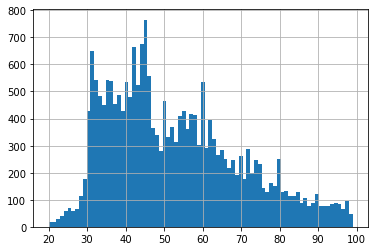

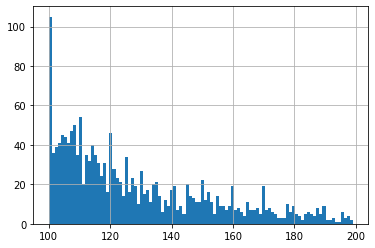

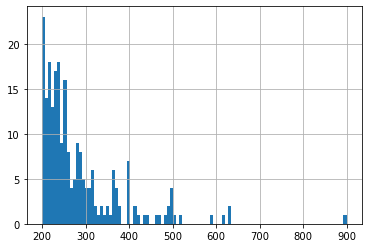

In [388]:
# Функцией hist() строим три гистограммы для параметра total_area.
data['total_area'].hist(bins=80, range=(20, 99))
plt.show()

data['total_area'].hist(bins=100, range=(100, 199))
plt.show()

data['total_area'].hist(bins=100, range=(200, data['total_area'].max()))
plt.show()

# Наблюдения по параметрам: total_area
Гистограммы параметра **total_area** выглядят адекватно. Пики в районе 30, 45 и 60 характеризуют однокомнатные, двухкомнатные и трёхкомнатные квартиры. После 60 идёт планомерное снижение.

Среди квартир с большой площадью выделяются квартиры по 100 квадратных метров. Возможно, это искажение, вызванное округлением площади квартир владельцами до «круглой» цифры.

Дальше виден очевидный тренд на уменьшение количества квартир с большой площадью.

In [389]:
# Проводим те же манипуляции с параметром living_area.
data['living_area'].describe()

count    23613.000000
mean        34.631557
std         22.394368
min          2.000000
25%         19.000000
50%         30.000000
75%         42.170000
max        409.700000
Name: living_area, dtype: float64

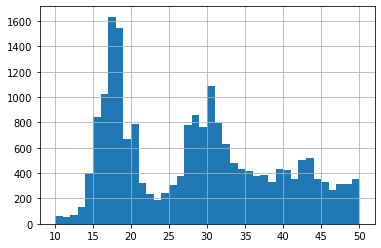

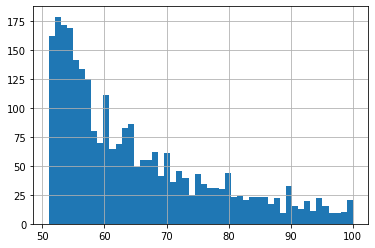

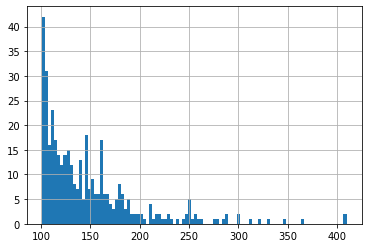

In [390]:
# И здесь те же действия.
data['living_area'].hist(bins=40, range=(10, 50))
plt.show()

data['living_area'].hist(bins=50, range=(51, 100))
plt.show()

data['living_area'].hist(bins=100, range=(101, data['living_area'].max()))
plt.show()

# Наблюдения по параметрам: living_area
Параметр **living_area** показывает схожие данные, соответствующие total_area.

Заметный провал в районе 25 отражается и на первой гистограмме total_area в промежутке от ~45 до 50.

In [391]:
# Здесь и далее с помощью describe() hist() изучаем остальные параметры объектов.
data['kitchen_area'].describe()

count    23613.000000
mean        10.493820
std          6.033237
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

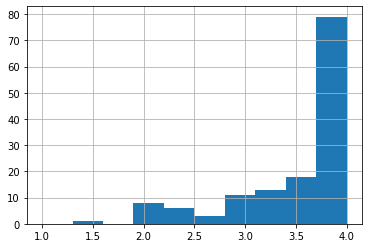

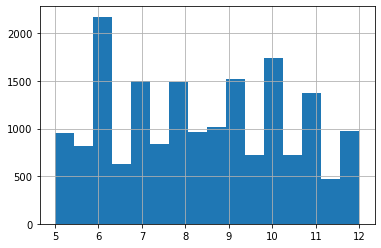

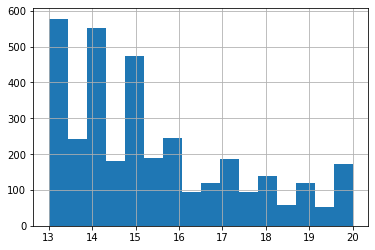

In [392]:
data['kitchen_area'].hist(bins=10, range=(1, 4))
plt.show()

data['kitchen_area'].hist(bins=16, range=(5, 12))
plt.show()

data['kitchen_area'].hist(bins=16, range=(13, 20))
plt.show()

# Наблюдения по параметрам: kitchen_area
Параметр **kitchen_area** также не позволяет сделать вывод о значительном искажении данных, соответствуя двум предыдущим параметрам.

In [393]:
data['last_price'].describe()

count    2.361200e+04
mean     6.540832e+06
std      1.090187e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

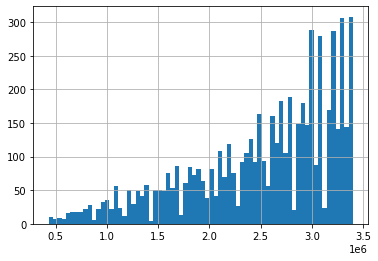

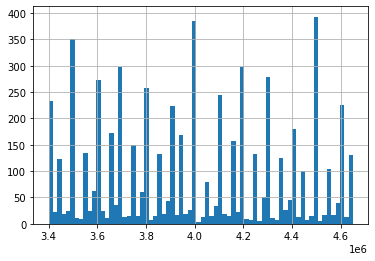

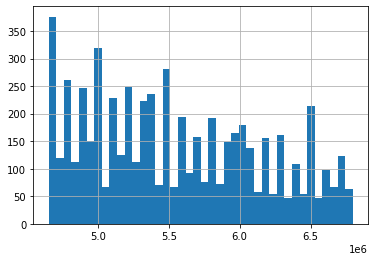

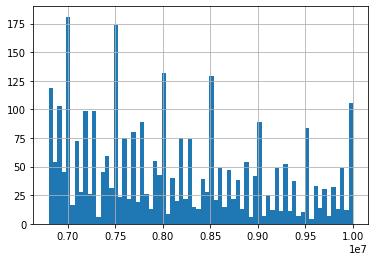

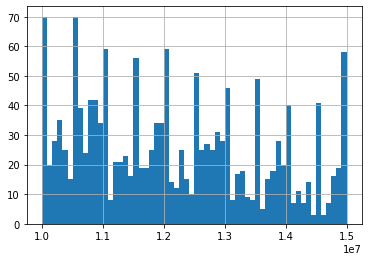

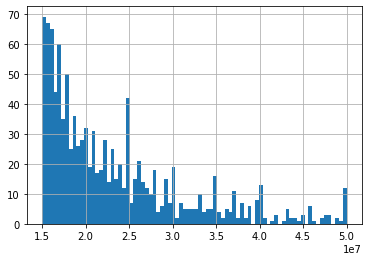

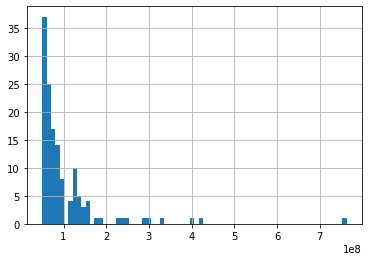

In [394]:
data['last_price'].hist(bins=70, range=(data['last_price'].min(), data['last_price'].quantile(0.25)))
plt.show()

data['last_price'].hist(bins=70, range=(data['last_price'].quantile(0.25), data['last_price'].median()))
plt.show()

data['last_price'].hist(bins=40, range=(data['last_price'].median(), data['last_price'].quantile(0.75)))
plt.show()

data['last_price'].hist(bins=70, range=(data['last_price'].quantile(0.75), 10000000))
plt.show()

data['last_price'].hist(bins=60, range=(10000000, 15000000))
plt.show()

data['last_price'].hist(bins=80, range=(15000000, 50000000))
plt.show()

data['last_price'].hist(bins=70, range=(50000000, data['last_price'].max()))
plt.show()

# Наблюдения по параметрам: last_price
Параметр **last_price** демонстрирует планомерное увеличение цены от минимальных значений к близким к первому квартилю (3.4 млн), затем значения планомерно распределяются, проходя медиану и верхний квартиль. После чего заметно постепенное уменьшение количества наблюдений, сопровождающееся увеличением цены.

In [395]:
data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

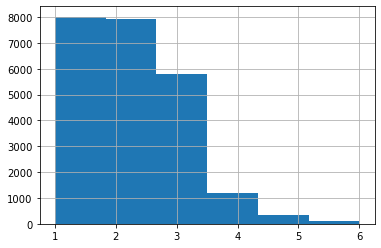

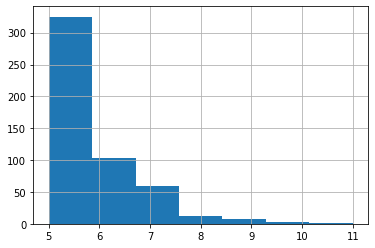

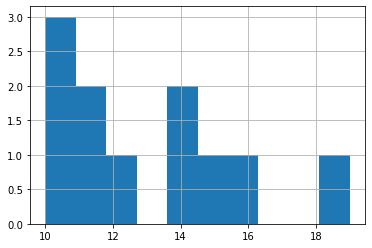

In [396]:
data['rooms'].hist(bins=6, range=(1, 6))
plt.show()

data['rooms'].hist(bins=7, range=(5, 11))
plt.show()

data['rooms'].hist(bins=10, range=(10, 19))
plt.show()

# Наблюдения по параметрам: rooms
Подавляющее число значений параметра **rooms** приходится на одно-, двух- и трёхкомнатные квартиры.

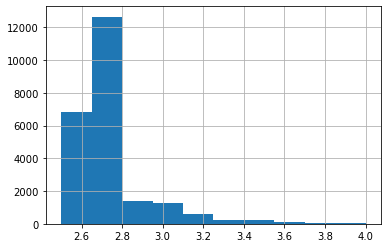

In [397]:
data['ceiling_height'].hist()
plt.show()

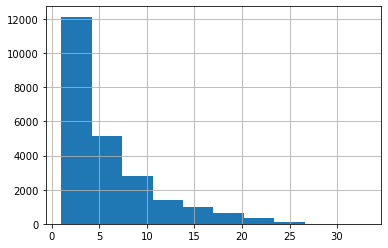

In [398]:
data['floor'].hist()
plt.show()

# Наблюдения по параметрам: ceiling_height и floor
Параметры **ceiling_height** и **floor** также выглядят визуально понятными и не вызывающими вопросов.

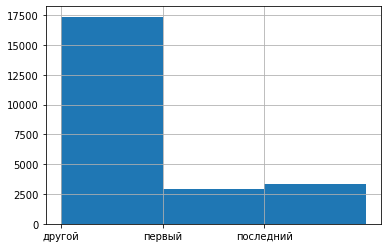

In [399]:
data['floor_type'].hist(bins=3, range=(0, 3))
plt.show()

# Наблюдения по параметрам: floor_type
В параметре **floor_type** наблюдается небольшой перевес количества последних этажей по сравнению с первыми.

In [400]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

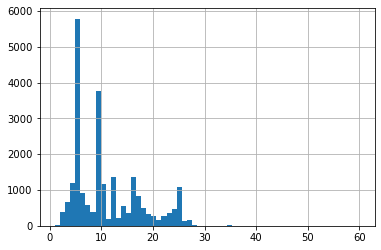

In [401]:
data['floors_total'].hist(bins=60, range=(1, 60))
plt.show()

# Наблюдения по параметрам: floors_total
В параметре **floors_total** можно увидеть превалирование пяти- и девятиэтажек.

In [402]:
data['citycenters_nearest'].describe()

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

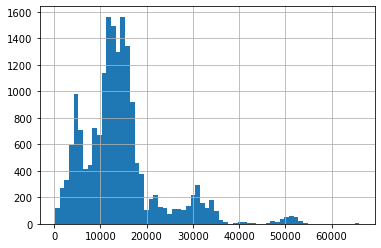

In [403]:
data['citycenters_nearest'].hist(bins=65)
plt.show()

# Наблюдения по параметрам: citycenters_nearest
По гистограмме параметра **citycenters_nearest** видно, что большая часть квартир расположена на расстоянии 10 000 – 20 000 м.

In [404]:
data['airports_nearest'].describe()

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

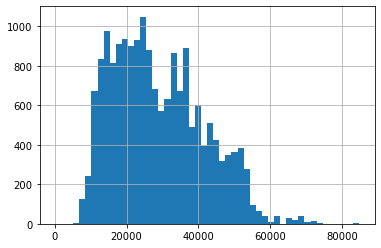

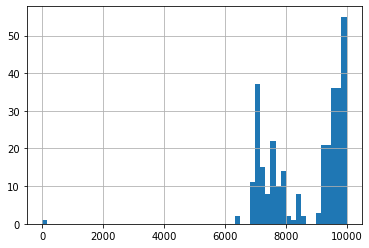

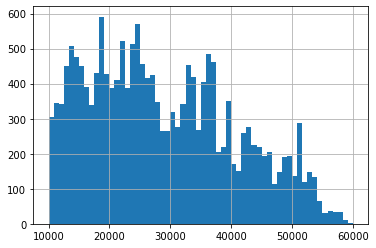

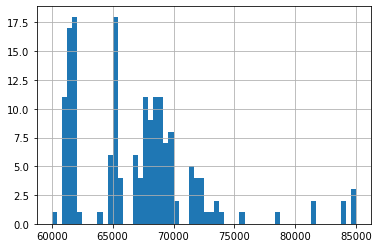

In [405]:
data['airports_nearest'].hist(bins=50)
plt.show()

data['airports_nearest'].hist(bins=60, range=(0, 10000))
plt.show()

data['airports_nearest'].hist(bins=60, range=(10000, 60000))
plt.show()

data['airports_nearest'].hist(bins=60, range=(60000, 85000))
plt.show()

In [406]:
data.loc[
        data['airports_nearest'] == data['airports_nearest'].min(),
        ['airports_nearest', 'parks_around3000', 'ponds_around3000', 'citycenters_nearest']
]

,airports_nearest,parks_around3000,ponds_around3000,citycenters_nearest
21085,0.0,0.0,0.0,22801.0


# Наблюдения по параметрам: airports_nearest
В параметре **airports_nearest** большая часть данных расположена в границах 10 000 – 40 000 м.

Заметно отсутствие квартир на расстоянии до 6 000 м, что объяснимо в случае аэропорта.

Однако виден странный объект со значением 0. При детальном рассмотрении строки в другими параметрами очевидно, что речь действительно идёт о жилье прямо у аэропорта. На это указывают отсутствие прудов и парков, а также расстояние до центра, которые проверяется через Яндекс.Карты.

In [407]:
data['parks_nearest'].describe()

count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

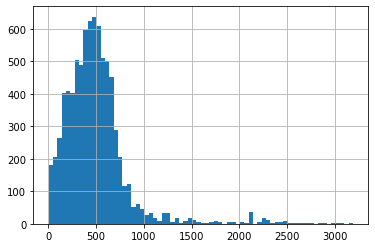

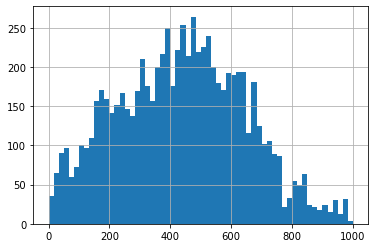

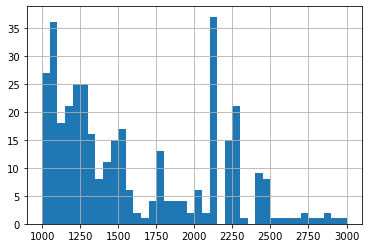

In [408]:
data['parks_nearest'].hist(bins=70)
plt.show()

data['parks_nearest'].hist(bins=60, range=(0, 1000))
plt.show()

data['parks_nearest'].hist(bins=40, range=(1000, 3000))
plt.show()

# Наблюдения по параметрам: parks_nearest
По параметру **parks_nearest** видно, что большая часть представленных в датасете квартир располагается в 200–700 метрах от ближайшего парка.

In [409]:
data['weekday_exposition'].describe()

count    23613.000000
mean         2.568035
std          1.788565
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

# Наблюдения по параметрам: weekday_exposition
Параметр **weekday_exposition** демонстрирует небольшое превалирование четвергов и вторников в качестве самого частого для публикации объявления дня недели.

Меньше всего объявлений было опубликовано в выходные.

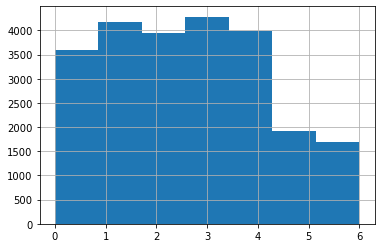

In [410]:
data['weekday_exposition'].hist(bins=7)
plt.show()

In [411]:
data['month_exposition'].describe()

count    23613.000000
mean         6.400076
std          3.493160
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

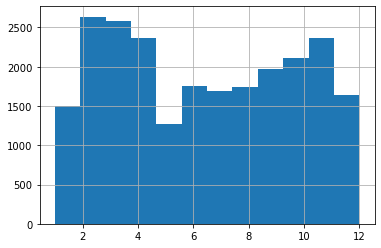

In [412]:
data['month_exposition'].hist(bins=12)
plt.show()

# Наблюдения по параметрам: month_exposition
В **month_exposition** мы видим, что самыми популярными месяцами являются февраль, март и апрель, а самым непопулярным — май.

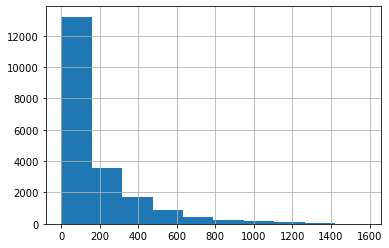

In [413]:
# Вооружившись знакомыми инструментами, приступим к изучению вопроса, как быстро продавались квартиры.
data['days_exposition'].hist()
plt.show()

In [414]:
data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

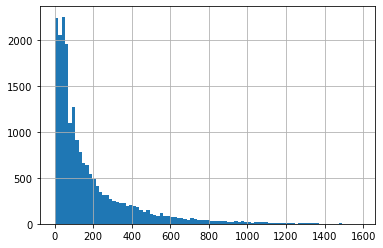

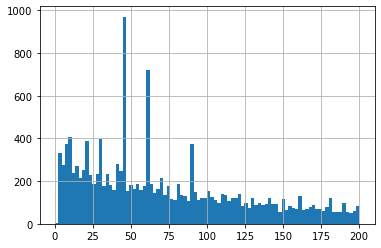

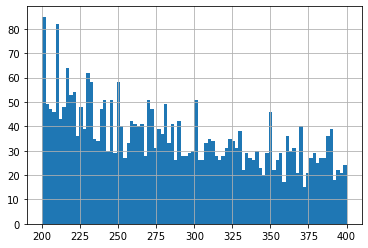

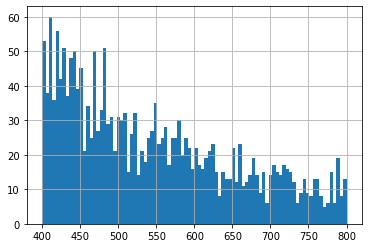

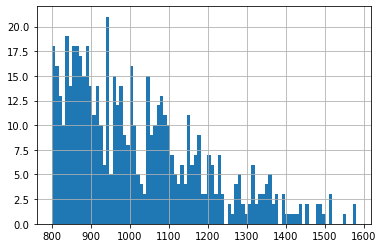

In [415]:
data['days_exposition'].hist(bins=90)
plt.show()

data['days_exposition'].hist(bins=90, range=(0, 200))
plt.show()

data['days_exposition'].hist(bins=90, range=(200, 400))
plt.show()

data['days_exposition'].hist(bins=90, range=(400, 800))
plt.show()

data['days_exposition'].hist(bins=90, range=(800, data['days_exposition'].max()))
plt.show()

# Cколько времени обычно занимает продажа
Среднее и медианное значения параметра *days_exposition* — 180 и 95 соответственно. Такая большая разница указывает на то, что данные имеют выраженные выбросы или асимметричное распределение.

Можно сделать вывод, что обычно **продажа занимает около 100 дней**.

Отталкиваясь от нижнего и верхнего квантиля, **быстрыми продажами** можно считать продажи **до 50 дней**, а необычно долгими — от **250 дней**.

In [416]:
# С помощью метода corr() посмотрим на корреляцию интересующих нас параметров объектов, объявив новую переменную.
data[
    ['last_price',
     'total_area',
     'living_area',
     'kitchen_area',
     'rooms',
     'weekday_exposition',
     'month_exposition',
     'year_exposition']
].corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday_exposition,month_exposition,year_exposition
last_price,1.000000,0.653646,0.585777,0.514172,0.363125,0.001287,0.002741,-0.042986
total_area,0.653646,1.000000,0.946417,0.660043,0.758324,-0.005680,0.004948,-0.079495
living_area,0.585777,0.946417,1.000000,0.502573,0.826747,-0.004637,-0.000337,-0.071598
kitchen_area,0.514172,0.660043,0.502573,1.000000,0.325073,-0.006106,0.003636,-0.059793
rooms,0.363125,0.758324,0.826747,0.325073,1.000000,-0.004991,-0.004004,-0.055295
weekday_exposition,0.001287,-0.005680,-0.004637,-0.006106,-0.004991,1.000000,0.012166,-0.003927
month_exposition,0.002741,0.004948,-0.000337,0.003636,-0.004004,0.012166,1.000000,-0.270031
year_exposition,-0.042986,-0.079495,-0.071598,-0.059793,-0.055295,-0.003927,-0.270031,1.000000


In [417]:
# Создаём функцией pivot_table() сводную таблицу по параметру total_area (жилая площадь).
(
    total_area_pivot :=\
    data
    .pivot_table(index='last_price',
                values='total_area')
).reset_index(inplace=True)

total_area_pivot

,last_price,total_area
0,430000.0,42.200000
1,440000.0,40.000000
2,450000.0,40.100000
3,470000.0,40.833333
4,480000.0,32.000000
...,...,...
2933,300000000.0,618.000000
2934,330000000.0,190.000000
2935,401300000.0,401.000000
2936,420000000.0,900.000000


In [418]:
# И начинаем изучать, зависит ли цена от общей площади.
# Сначала воспользуемся методом corr().
total_area_pivot.corr()

,last_price,total_area
last_price,1.000000,0.690086
total_area,0.690086,1.000000


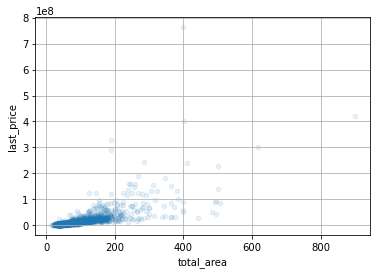

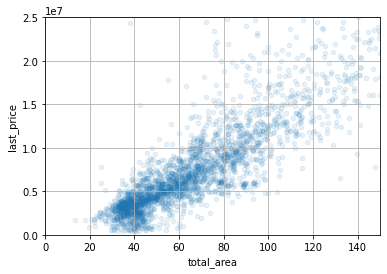

In [419]:
# Затем функцией plot() построим график типа scatter (точечный график).
# И посмотрим, есть ли между двумя переменными линейная зависимость.
(
    total_area_pivot
    .plot(x='total_area',
          y='last_price',
          kind='scatter',
          alpha=0.1,
          grid=True)
)

# Посмотрим на график поближе, в срезе от 0 до 300.
(
    total_area_pivot
    .plot(x='total_area',
          y='last_price',
          kind='scatter',
          alpha=0.1,
          grid=True)
)

# Для этого изменим масштаб оси x, передав xlim нужные нам цифры.
plt.xlim(0, 150)
plt.ylim(0, 25000000)
plt.show()

# Зависит ли цена от общей площади
Мы видим, что точки на графике расположены близко к линии, которая идёт вверх и вправо, есть заметные выбросы, а **коэффициент корреляции составляет 0.68.** Это говорит о **умеренной положительной корреляции.**

In [420]:
# Приступим к изучению остальных параметров, которые могут влиять на стоимость объекта.
(
    living_area_pivot :=\
    data
    .pivot_table(index='last_price',
                values='living_area')
).reset_index(inplace=True)

living_area_pivot

,last_price,living_area
0,430000.0,23.575000
1,440000.0,23.080000
2,450000.0,23.202500
3,470000.0,27.116667
4,480000.0,16.000000
...,...,...
2933,300000000.0,258.000000
2934,330000000.0,95.000000
2935,401300000.0,204.000000
2936,420000000.0,409.700000


In [421]:
living_area_pivot.corr()

,last_price,living_area
last_price,1.000000,0.641977
living_area,0.641977,1.000000


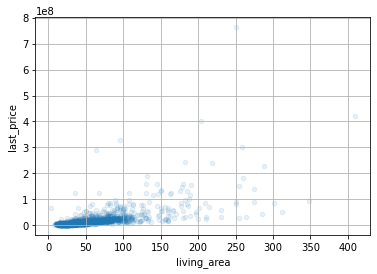

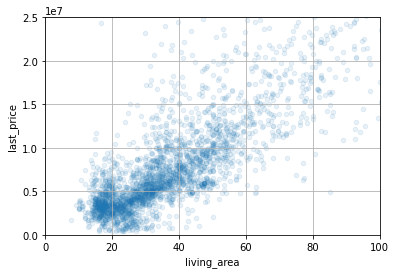

In [422]:
(
    living_area_pivot
    .plot(x='living_area',
          y='last_price',
          kind='scatter',
          alpha=0.1,
          grid=True)
)

(
    living_area_pivot
    .plot(x='living_area',
          y='last_price',
          kind='scatter',
          alpha=0.1,
          grid=True)
)

plt.xlim(0, 100)
plt.ylim(0, 25000000)
plt.show()

# Зависит ли цена от жилой площади
Здесь похожая ситуация. Мы также видим наличие **умеренной положительной корреляции** двух переменных.

In [423]:
(
    kitchen_area_pivot :=\
    data
    .pivot_table(index='last_price',
                values='kitchen_area')
).reset_index(inplace=True)

kitchen_area_pivot

,last_price,kitchen_area
0,430000.0,7.700000
1,440000.0,6.900000
2,450000.0,6.625000
3,470000.0,7.633333
4,480000.0,5.500000
...,...,...
2933,300000000.0,70.000000
2934,330000000.0,40.000000
2935,401300000.0,24.000000
2936,420000000.0,112.000000


In [424]:
kitchen_area_pivot.corr()

,last_price,kitchen_area
last_price,1.000000,0.572774
kitchen_area,0.572774,1.000000


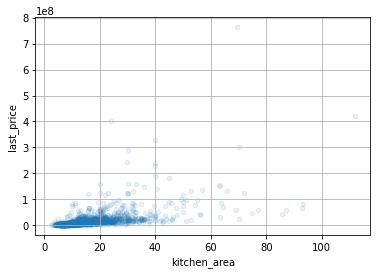

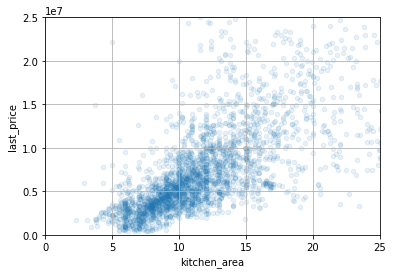

In [425]:
(
    kitchen_area_pivot
    .plot(x='kitchen_area',
          y='last_price',
          kind='scatter',
          alpha=0.1,
          grid=True)
)

(
    kitchen_area_pivot
    .plot(x='kitchen_area',
          y='last_price',
          kind='scatter',
          alpha=0.1,
          grid=True)
)

plt.xlim(0, 25)
plt.ylim(0, 25000000)
plt.show()

# Зависит ли цена от площади кухни
И здесь заметна **умеренная положительная корреляция**, хоть и меньшая, чем в случае предудущих параметров.

In [426]:
(
    rooms_pivot :=\
    data
    .pivot_table(index='rooms',
                values='last_price',
                aggfunc='median')
).reset_index(inplace=True)

rooms_pivot

,rooms,last_price
0,0,2700000.0
1,1,3600000.0
2,2,4768857.0
3,3,6200000.0
4,4,9000000.0
5,5,14000000.0
6,6,19000000.0
7,7,24900000.0
8,8,23095000.0
9,9,23750000.0


In [427]:
rooms_pivot.corr()

,rooms,last_price
rooms,1.0000,0.2861
last_price,0.2861,1.0000


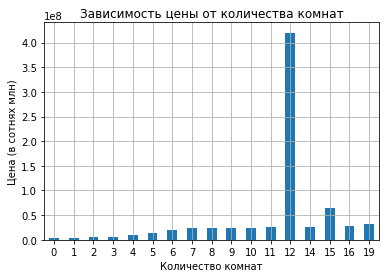

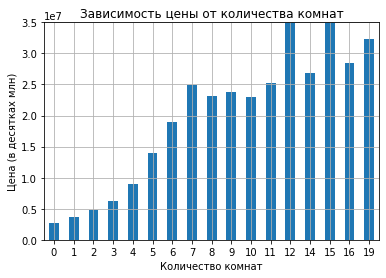

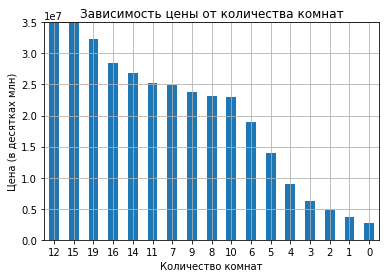

In [428]:
# В случае параметра rooms (количество комнат) мы имеем ограниченное число наблюдений — 16.
# Поэтому будет лучше обратиться к столбчатой диаграмме (bar chart).

rooms_pivot.plot(kind='bar',
                 x='rooms',
                 y='last_price',
                 title='Зависимость цены от количества комнат',
                 ylabel='Цена (в сотнях млн)',
                 xlabel='Количество комнат',
                 rot=0,
                 legend=False,
                 grid=True)

rooms_pivot.plot(kind='bar',
                 x='rooms',
                 y='last_price',
                 title='Зависимость цены от количества комнат',
                 ylabel='Цена (в десятках млн)',
                 xlabel='Количество комнат',
                 rot=0,
                 legend=False,
                 grid=True,
                 ylim=(0, 35000000))

(
    rooms_pivot
    .sort_values(by='last_price', ascending=False)
    .plot(kind='bar',
          x='rooms',
          y='last_price',
          title='Зависимость цены от количества комнат',
          ylabel='Цена (в десятках млн)',
          xlabel='Количество комнат',
          rot=0,
          legend=False,
          grid=True,
          ylim=(0, 35000000))
)

plt.show()

# Зависит ли цена от количества комнат.
Здесь видна очевидная **сильная положительная корреляция в срезе от 1 до 7 комнат.** Однако после цена объекта и количество комнат не имеют такой сильной взаимосвязи.

In [429]:
(
    floor_type_pivot :=\
    data
    .pivot_table(index='floor_type',
                 values='last_price',
                 aggfunc='median')
).reset_index(inplace=True)

floor_type_pivot

,floor_type,last_price
0,другой,4850000.0
1,первый,3900000.0
2,последний,4300000.0


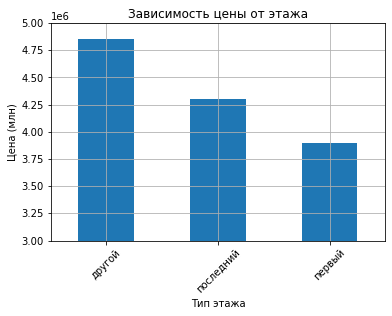

In [430]:
# Здесть также воспользуемся столбчатой диаграммой из-за всего трёх имеющихся наблюдений.
(
    floor_type_pivot
    .sort_values(by='last_price', ascending=False)
    .plot(kind='bar',
          x='floor_type',
          y='last_price',
          title='Зависимость цены от этажа',
          ylabel='Цена (млн)',
          xlabel='Тип этажа',
          ylim=(3000000, 5000000),
          rot=45,
          legend=False,
          grid=True)
)

plt.show()

# Зависит ли цена от этажа, на котором расположена квартира
Мы видим прямую зависимость от типа этажа: **наиболее дорогие квартиры расположены не на первом и не на последнем этаже. Наиболее дешёвые — на первом этаже**.

In [431]:
(
    weekday_pivot :=\
    data
    .pivot_table(index='weekday_exposition',
                values='last_price',
                aggfunc='median')
).reset_index(inplace=True)

weekday_pivot

,weekday_exposition,last_price
0,0,4650000.0
1,1,4725000.0
2,2,4700000.0
3,3,4650000.0
4,4,4577500.0
5,5,4550000.0
6,6,4540000.0


In [432]:
weekday_pivot.corr()

,weekday_exposition,last_price
weekday_exposition,1.000000,-0.848625
last_price,-0.848625,1.000000


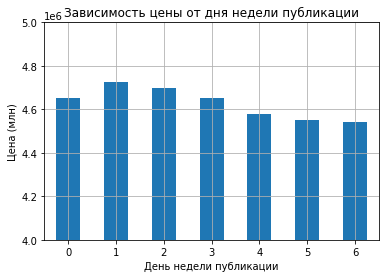

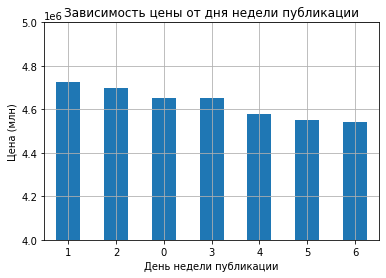

In [433]:
weekday_pivot.plot(kind='bar',
                   x='weekday_exposition',
                   y='last_price',
                   title='Зависимость цены от дня недели публикации',
                   ylabel='Цена (млн)',
                   xlabel='День недели публикации',
                   ylim=(4000000, 5000000),
                   rot=0,
                   legend=False,
                   grid=True)

(
    weekday_pivot
    .sort_values(by='last_price', ascending=False)
    .plot(kind='bar',
          x='weekday_exposition',
          y='last_price',
          title='Зависимость цены от дня недели публикации',
          ylabel='Цена (млн)',
          xlabel='День недели публикации',
          ylim=(4000000, 5000000),
          rot=0,
          legend=False,
          grid=True)
)

plt.show()

# Зависит ли цена от дня недели публикации объявления
По данному параметру наблюдается **сильная отрицательная корреляция.** Квартиры, объявления о продаже которых публикуются в начале недели, стоят дороже. К концу недели медианная цена объекта планомерно снижается.

In [434]:
(
    month_pivot :=\
    data
    .pivot_table(index='month_exposition',
                values='last_price',
                aggfunc='median')
).reset_index(inplace=True)

month_pivot

,month_exposition,last_price
0,1,4600000.0
1,2,4650000.0
2,3,4650000.0
3,4,4800000.0
4,5,4500000.0
5,6,4400000.0
6,7,4650000.0
7,8,4570000.0
8,9,4700000.0
9,10,4570000.0


In [435]:
month_pivot.corr()

,month_exposition,last_price
month_exposition,1.000000,0.113587
last_price,0.113587,1.000000


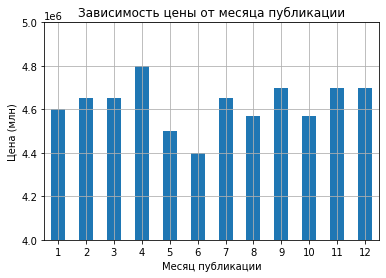

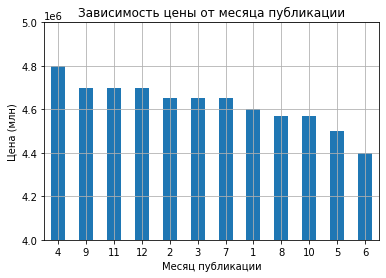

In [436]:
month_pivot.plot(kind='bar',
                 x='month_exposition',
                 y='last_price',
                 title='Зависимость цены от месяца публикации',
                 ylabel='Цена (млн)',
                 xlabel='Месяц публикации',
                 ylim=(4000000, 5000000),
                 rot=0,
                 legend=False,
                 grid=True)

(
    month_pivot
    .sort_values(by='last_price', ascending=False)
    .plot(kind='bar',
          x='month_exposition',
          y='last_price',
          title='Зависимость цены от месяца публикации',
          ylabel='Цена (млн)',
          xlabel='Месяц публикации',
          ylim=(4000000, 5000000),
          rot=0,
          legend=False,
          grid=True)
)

plt.show()

# Зависит ли цена от месяца публикации объявления
Здесь мы **не видим корреляции** двух величин.

In [437]:
(
    year_pivot :=\
    data
    .pivot_table(index='year_exposition',
                 values='last_price',
                 aggfunc='median')
).reset_index(inplace=True)

year_pivot

,year_exposition,last_price
0,2014,7700000.0
1,2015,5312500.0
2,2016,4550000.0
3,2017,4500000.0
4,2018,4550000.0
5,2019,5050000.0


In [438]:
year_pivot.corr()

,year_exposition,last_price
year_exposition,1.000000,-0.676494
last_price,-0.676494,1.000000


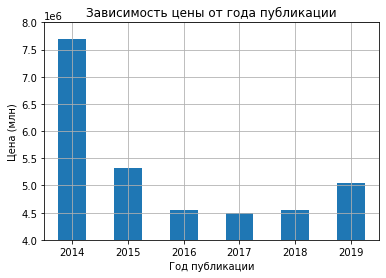

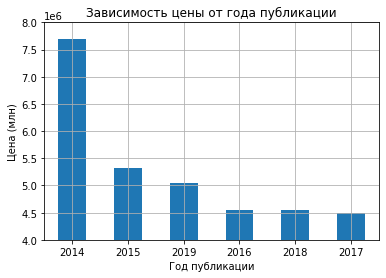

In [439]:
year_pivot.plot(kind='bar',
                x='year_exposition',
                y='last_price',
                title='Зависимость цены от года публикации',
                ylabel='Цена (млн)',
                xlabel='Год публикации',
                ylim=(4000000, 8000000),
                rot=0,
                legend=False,
                grid=True)

(
    year_pivot
    .sort_values(by='last_price', ascending=False)
    .plot(kind='bar',
          x='year_exposition',
          y='last_price',
          title='Зависимость цены от года публикации',
          ylabel='Цена (млн)',
          xlabel='Год публикации',
          ylim=(4000000, 8000000),
          rot=0,
          legend=False,
          grid=True)
)

plt.show()

In [440]:
# Выглядит странно. Воспользуемся методом value_counts(), чтобы посмотреть, сколько объявлений было опубликовано за каждый год.
data['year_exposition'].value_counts()

2018    8492
2017    8166
2019    2871
2016    2763
2015    1184
2014     137
Name: year_exposition, dtype: int64

# Зависит ли цена от года публикации объявления
Мы видим максимальную медианную цену в 2014 году, затем идёт 2015 год. Однако суммарное количество наблюдений в период с 2014 по 2016 год не достигает того количества, которые присутствуют в датасете, например, за 2017 год.

**Из-за недостаточного количества наблюдений мы не можем сделать какие-то выводы о зависимости цены от года публикации объявления**, кроме того, что в следующий за первым по достаточности выборки годом, то есть в 2018-м по сравнению с 2017-м, медианная цена квартиры в Санкт-Петербурге немного выросла.

In [441]:
# Чтобы определить населённые пункты с самой высокой и низкой стоимостью квадратного метра, строим сводную таблицу.
sqr_m_data = data.pivot_table(index='locality_name',
                              values=['last_price', 'total_area'],
                              aggfunc=['mean', 'count'])
sqr_m_data

mean                  count           
                   last_price  total_area last_price total_area
locality_name                                                  
Агалатово        3.567500e+06   49.175000          4          4
Александровская  8.725000e+06  118.500000          2          2
Алексеевка       1.000000e+06   45.000000          1          1
Аннино           3.116114e+06   49.125000         16         16
Аро              3.240000e+06   63.433333          3          3
...                       ...         ...        ...        ...
Юкки             4.350000e+06   54.840000          5          5
Ялгино           7.770000e+05   44.000000          1          1
Яльгелево        2.575000e+06   46.650000          6          6
Ям-Тесово        6.250000e+05   44.750000          2          2
Янино-1          3.414478e+06   48.972206         68         68

[305 rows x 4 columns]

In [442]:
# В созданном датафрейме удаляем верхний уровень методом droplevel().
sqr_m_data.columns = sqr_m_data.columns.droplevel()
sqr_m_data

,last_price,total_area,last_price,total_area
locality_name,,,,
Агалатово,3.567500e+06,49.175000,4,4
Александровская,8.725000e+06,118.500000,2,2
Алексеевка,1.000000e+06,45.000000,1,1
Аннино,3.116114e+06,49.125000,16,16
Аро,3.240000e+06,63.433333,3,3
...,...,...,...,...
Юкки,4.350000e+06,54.840000,5,5
Ялгино,7.770000e+05,44.000000,1,1
Яльгелево,2.575000e+06,46.650000,6,6


In [443]:
# Обратившись к columns, переименовываем названия колонок, задав последней имя del, так как она нам не нужна и мы её удалим.
sqr_m_data.columns = ['last_price', 'total_area', 'count', 'del']
sqr_m_data

,last_price,total_area,count,del
locality_name,,,,
Агалатово,3.567500e+06,49.175000,4,4
Александровская,8.725000e+06,118.500000,2,2
Алексеевка,1.000000e+06,45.000000,1,1
Аннино,3.116114e+06,49.125000,16,16
Аро,3.240000e+06,63.433333,3,3
...,...,...,...,...
Юкки,4.350000e+06,54.840000,5,5
Ялгино,7.770000e+05,44.000000,1,1
Яльгелево,2.575000e+06,46.650000,6,6


In [444]:
# Методом drop() удаляем колонку del.
sqr_m_data.drop('del', axis=1, inplace=True)
sqr_m_data

,last_price,total_area,count
locality_name,,,
Агалатово,3.567500e+06,49.175000,4
Александровская,8.725000e+06,118.500000,2
Алексеевка,1.000000e+06,45.000000,1
Аннино,3.116114e+06,49.125000,16
Аро,3.240000e+06,63.433333,3
...,...,...,...
Юкки,4.350000e+06,54.840000,5
Ялгино,7.770000e+05,44.000000,1
Яльгелево,2.575000e+06,46.650000,6


In [445]:
# Методом reset_index() зададим нашему датафрейму индексы.
sqr_m_data.reset_index(inplace=True)
sqr_m_data

,locality_name,last_price,total_area,count
0,Агалатово,3.567500e+06,49.175000,4
1,Александровская,8.725000e+06,118.500000,2
2,Алексеевка,1.000000e+06,45.000000,1
3,Аннино,3.116114e+06,49.125000,16
4,Аро,3.240000e+06,63.433333,3
...,...,...,...,...
300,Юкки,4.350000e+06,54.840000,5
301,Ялгино,7.770000e+05,44.000000,1
302,Яльгелево,2.575000e+06,46.650000,6
303,Ям-Тесово,6.250000e+05,44.750000,2


In [446]:
# Отсортируем методом sort_values() датафрейм по столбцу count (количество объявлений) в порядке убывания.
# И методом head() получим 10 населённых пунктов с наибольшим числом объявлений.
sqr_m_data = sqr_m_data.sort_values(by='count', ascending=False).head(10)
sqr_m_data

,locality_name,last_price,total_area,count
223,Санкт-Петербург,8.065410e+06,64.746341,15650
146,Мурино,3.680841e+06,44.144010,586
105,Кудрово,4.354895e+06,46.391340,470
298,Шушары,4.109809e+06,53.886925,439
34,Всеволожск,3.789068e+06,56.022186,398
202,Пушкин,6.469036e+06,61.552791,369
88,Колпино,3.964021e+06,53.231479,338
170,Парголово,4.488075e+06,51.521407,327
42,Гатчина,3.488337e+06,50.942932,307
35,Выборг,3.250983e+06,56.150042,237


In [447]:
# Вновь прибегнем к методу reset_index, чтобы сбросить индексы в таблице.
sqr_m_data.reset_index(drop=True, inplace=True)
sqr_m_data

,locality_name,last_price,total_area,count
0,Санкт-Петербург,8.065410e+06,64.746341,15650
1,Мурино,3.680841e+06,44.144010,586
2,Кудрово,4.354895e+06,46.391340,470
3,Шушары,4.109809e+06,53.886925,439
4,Всеволожск,3.789068e+06,56.022186,398
5,Пушкин,6.469036e+06,61.552791,369
6,Колпино,3.964021e+06,53.231479,338
7,Парголово,4.488075e+06,51.521407,327
8,Гатчина,3.488337e+06,50.942932,307
9,Выборг,3.250983e+06,56.150042,237


In [448]:
# Создадим новый столбец sqr_m_price — цена за квадратный метр.
sqr_m_data['sqr_m_price'] = sqr_m_data['last_price'] / sqr_m_data['total_area']
sqr_m_data

,locality_name,last_price,total_area,count,sqr_m_price
0,Санкт-Петербург,8.065410e+06,64.746341,15650,124569.352831
1,Мурино,3.680841e+06,44.144010,586,83382.564589
2,Кудрово,4.354895e+06,46.391340,470,93873.020139
3,Шушары,4.109809e+06,53.886925,439,76267.270155
4,Всеволожск,3.789068e+06,56.022186,398,67635.128626
5,Пушкин,6.469036e+06,61.552791,369,105097.361245
6,Колпино,3.964021e+06,53.231479,338,74467.617484
7,Парголово,4.488075e+06,51.521407,327,87110.874551
8,Гатчина,3.488337e+06,50.942932,307,68475.381534
9,Выборг,3.250983e+06,56.150042,237,57898.142109


In [449]:
# Методом round() округлим полученные значения до одного знака после запятой.
sqr_m_data['sqr_m_price'] = sqr_m_data['sqr_m_price'].round(1)
sqr_m_data

,locality_name,last_price,total_area,count,sqr_m_price
0,Санкт-Петербург,8.065410e+06,64.746341,15650,124569.4
1,Мурино,3.680841e+06,44.144010,586,83382.6
2,Кудрово,4.354895e+06,46.391340,470,93873.0
3,Шушары,4.109809e+06,53.886925,439,76267.3
4,Всеволожск,3.789068e+06,56.022186,398,67635.1
5,Пушкин,6.469036e+06,61.552791,369,105097.4
6,Колпино,3.964021e+06,53.231479,338,74467.6
7,Парголово,4.488075e+06,51.521407,327,87110.9
8,Гатчина,3.488337e+06,50.942932,307,68475.4
9,Выборг,3.250983e+06,56.150042,237,57898.1


In [450]:
# То же проделаем и со столбцом last_price.
sqr_m_data['last_price'] = sqr_m_data['last_price'].round(1)
sqr_m_data

,locality_name,last_price,total_area,count,sqr_m_price
0,Санкт-Петербург,8065409.9,64.746341,15650,124569.4
1,Мурино,3680840.8,44.144010,586,83382.6
2,Кудрово,4354895.2,46.391340,470,93873.0
3,Шушары,4109808.7,53.886925,439,76267.3
4,Всеволожск,3789067.8,56.022186,398,67635.1
5,Пушкин,6469035.9,61.552791,369,105097.4
6,Колпино,3964021.4,53.231479,338,74467.6
7,Парголово,4488074.8,51.521407,327,87110.9
8,Гатчина,3488336.7,50.942932,307,68475.4
9,Выборг,3250983.1,56.150042,237,57898.1


In [451]:
# И со столбцом total_area.
sqr_m_data['total_area'] = sqr_m_data['total_area'].round(1)
sqr_m_data

,locality_name,last_price,total_area,count,sqr_m_price
0,Санкт-Петербург,8065409.9,64.7,15650,124569.4
1,Мурино,3680840.8,44.1,586,83382.6
2,Кудрово,4354895.2,46.4,470,93873.0
3,Шушары,4109808.7,53.9,439,76267.3
4,Всеволожск,3789067.8,56.0,398,67635.1
5,Пушкин,6469035.9,61.6,369,105097.4
6,Колпино,3964021.4,53.2,338,74467.6
7,Парголово,4488074.8,51.5,327,87110.9
8,Гатчина,3488336.7,50.9,307,68475.4
9,Выборг,3250983.1,56.2,237,57898.1


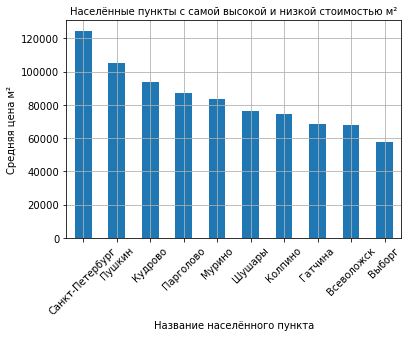

In [452]:
# Построим столбчатую диаграмму, отсортировав таблицу по убыванию значений в столбце sqr_m_price.
# Чтобы посмотреть населённые пункты с самой высокой и низкой стоимостью квадратного метра.
(
    sqr_m_data
    .sort_values(by='sqr_m_price', ascending=False)
    .plot(kind='bar',
          x='locality_name',
          y='sqr_m_price',
          rot=45,
          legend=False,
          grid=True)
)

plt.title('Населённые пункты с самой высокой и низкой стоимостью м²', fontsize=10)
plt.xlabel('Название населённого пункта', fontsize=10)
plt.ylabel('Средняя цена м²', fontsize=10)
plt.show()

In [453]:
# Выделяем квартиры в Санкт-Петербурге через логическую индексацию.
data_spb_km = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb_km

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,citycenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,91.73,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.31,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другой,16
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.00,2,False,...,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой,6
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой,4
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4


In [454]:
# Методом groupby() группируем полученную таблицу по параметру citycenters_nearest_km (расстояние до центра города в км).
# Подсчитываем, обратившись к столбцу last_price, среднюю цену каждого километра функцией mean().
# И округляем до одного знака после запятой методом round().
data_spb_km = data_spb_km.groupby(by='citycenters_nearest_km')['last_price'].mean().round(1)
data_spb_km

citycenters_nearest_km
0     31449115.9
1     21206720.8
2     17788319.6
3     11137394.7
4     13304279.5
5     14455995.6
6     15338418.4
7     14775152.6
8      9949111.4
9      6968353.1
10     6500434.2
11     6228107.9
12     5834618.7
13     6077642.6
14     5625172.8
15     5876323.0
16     5373130.6
17     5299495.9
18     5091331.3
19     5051410.0
20     5951464.8
21     5493469.4
22     5415524.3
23     4985376.5
24     3854429.6
25     4052839.9
26     4014287.0
27     8300000.0
28     5026428.6
29     4236666.7
Name: last_price, dtype: float64

In [455]:
# Устанавливаем индексы, превращая получившийся объект Series в полноценный DataFrame.
data_spb_km = data_spb_km.reset_index()
data_spb_km

,citycenters_nearest_km,last_price
0,0,31449115.9
1,1,21206720.8
2,2,17788319.6
3,3,11137394.7
4,4,13304279.5
5,5,14455995.6
6,6,15338418.4
7,7,14775152.6
8,8,9949111.4
9,9,6968353.1


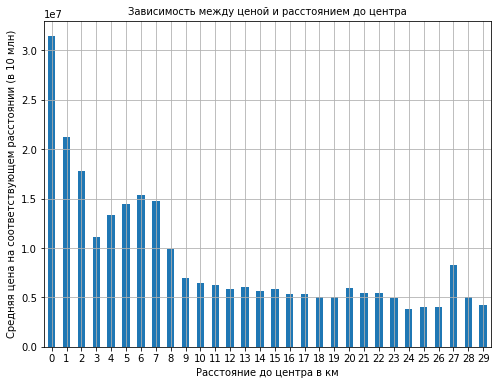

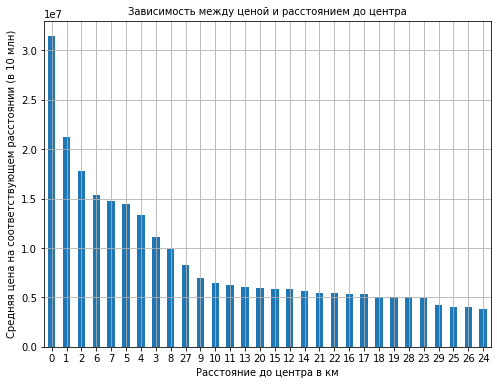

In [456]:
# Чтобы описать, как стоимость объектов зависит от расстояния до центра города, вновь обратимся к столбчатой диаграмме.
data_spb_km.plot(kind='bar',
                 x='citycenters_nearest_km',
                 y='last_price',
                 figsize=(8, 6),
                 rot=0,
                 legend=False,
                 grid=True)

plt.title('Зависимость между ценой и расстоянием до центра', fontsize=10)
plt.xlabel('Расстояние до центра в км', fontsize=10)
plt.ylabel('Средняя цена на соответствующем расстоянии (в 10 млн)', fontsize=10)

# Посмотрим на данные в отсортированном (по столбцу last_price) виде.
(
    data_spb_km
    .sort_values(by='last_price', ascending=False)
    .plot(kind='bar',
          x='citycenters_nearest_km',
          y='last_price',
          figsize=(8, 6),
          rot=0,
          legend=False,
          grid=True)
)

plt.title('Зависимость между ценой и расстоянием до центра', fontsize=10)
plt.xlabel('Расстояние до центра в км', fontsize=10)
plt.ylabel('Средняя цена на соответствующем расстоянии (в 10 млн)', fontsize=10)

plt.show()

# Зависимость между ценой и расстоянием до центра
**Цена на недвижимость и расстоянии до центра города положительно коррелируют.** На графике мы видим, что на рынке присутствует много дорогих квартир в историческом центре и дорогостоящей загородной недвижимости.

Вероятно, цифры на графике территориально можно расшифровать следующим образом:
- 0 км — «Золотой треугольник».
- 1 и 2 км — исторический центр.
- 6 и 7 км — элитные новостройки на Крестовском острове.
- 5, 4 и 3 км — Петроградская сторона и Васильевский остров.

# Общий вывод
Обозначим интересные особенности и зависимости, которые существуют на рынке.

- Основу петербургского рынка недвижимости составляют **однокомнатные, двухкомнатные и трёхкомнатные** квартиры.
- Среди объектов с большой площадью выделяются квартиры по **100 квадратных метров.** Возможно, это **искажение, вызванное округлением площади владельцами до «круглой» цифры.**
- На рынке превалируют **пяти- и девятиэтажные дома.**
- Большая часть квартир расположена на расстоянии **10–20 км от центра** и в **10-40 км от аэропорта** Пулково.
- Чаще всего объявления публикуются **по четвергам и вторникам**. Реже всего — в выходные.
- Самые популярные месяца для публикации объявлений — **февраль, март и апрель.** Май — самый непопулярный.
- Обычно продажа занимает около **100 дней**. Быстрыми продажами можно считать продажи до 50 дней, необычно долгими — от 250 дней.
- Цена квартиры в умеренной степени зависит от **общей и жилой площади.** В меньшей степени — от площади кухни.
- **Цена квартир комнатностью 1–7 сильно зависит от количества комнат**. С комнатностью выше 7 такая корреляция не прослеживается.
- Наиболее дорогие квартиры расположены **не на первом и не на последнем этаже.**
- **Квартиры, объявления о продаже которых публикуются в начале недели, стоят дороже.** К концу недели — дешевле.
- Из-за **малой выборки по годам** мы не можем сделать достоверные выводы об изменениях цен на рынке за последние годы.
- Не считая Санкт-Петербурга, самая высокая стоимость квадратного метра в **Пушкине.**
- На рынке присутствует значительное количество дорогих квартир в историческом центре и дорогостоящей загородной недвижимости. При этом **зависимость цены от расстояния до центра также присутствует.**